In [ ]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

%matplotlib inline
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

import plotly.io as pio
pio.renderers.default = 'colab'

# Set seeds to make the experiment more reproducible.
from tensorflow.random import set_seed
from numpy.random import seed
set_seed(1)
seed(1)

In [ ]:
fund = pd.read_csv("fundamentals.csv")
secur = pd.read_csv("securities.csv")
price = pd.read_csv("prices.csv")
df = pd.read_csv("prices-split-adjusted.csv", index_col = 0)
df

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...
2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0


In [ ]:
num = 0
for i in fund.columns:
  num += 1
print(num)

79


In [ ]:
price.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In [ ]:
secur.columns

Index(['Ticker symbol', 'Security', 'SEC filings', 'GICS Sector',
       'GICS Sub Industry', 'Address of Headquarters', 'Date first added',
       'CIK'],
      dtype='object')

In [ ]:
fund[0:10]

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-2.220000e+08,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,1.270000e+08,1.049900e+10,78.0,0.000000e+00,2.230000e+08,1.001000e+09,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-5.690000e+08,8.690000e+08,632000000.0,5.800000e+08,3.060000e+08,4.730000e+08,7.116000e+09,0.000000e+00,0.0,0.0,-1.020000e+09,1.970000e+08,1.285000e+09,4.830000e+08,-1.571000e+09,-1.876000e+09,2.050000e+09,-1.876000e+09,-4.084000e+09,1.124000e+09,3.860000e+08,1.480000e+08,1.0,2.167000e+09,6.260000e+08,4.524000e+09,-2.980000e+09,1.509000e+09,1.100000e+07,1.514700e+10,-1.410000e+08,8.450000e+08,10.0,31.0,8.0,72.0,0.000000e+00,-9.462000e+09,0.000000e+00,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-9.300000e+07,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5.000000e+06,1.101900e+10,104.0,0.000000e+00,9.350000e+08,1.020000e+09,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-3.460000e+08,2.311000e+09,856000000.0,1.012000e+09,-1.181000e+09,-2.350000e+08,1.535300e+10,0.000000e+00,0.0,0.0,2.208000e+09,6.600000e+08,6.750000e+08,3.799000e+09,-3.814000e+09,-1.834000e+09,1.873000e+09,-1.834000e+09,-4.489000e+09,1.560000e+09,5.590000e+08,1.399000e+09,5.0,2.299000e+09,1.465000e+09,7.385000e+09,-2.032000e+09,1.711000e+09,4.810000e+08,1.491500e+10,-5.600000e+07,8.530000e+08,8.0,80.0,7.0,96.0,0.000000e+00,-1.129600e+10,0.000000e+00,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-1.600000e+08,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7.000000e+06,1.562000e+10,88.0,0.000000e+00,8.290000e+08,1.342000e+09,4.099000e+09,3.212000e+09,0.0,0.0,2.308400e+10,4.091000e+09,63.0,2.703000e+10,3.300000e+08,2.240000e+09,887000000.0,1.004000e+09,1.799000e+09,-1.026000e+09,1.604300e+10,0.000000e+00,0.0,0.0,1.700000e+08,-1.460000e+08,3.080000e+09,-3.150000e+08,-2.911000e+09,2.882000e+09,5.420000e+08,2.882000e+09,2.882000e+09,1.771000e+09,8.000000e+08,4.249000e+09,10.0,2.060000e+09,8.980000e+08,7.059000e+09,-4.559000e+09,8.170000e+08,6.010000e+08,1.092800e+10,-5.000000e+08,1.295000e+09,8.0,159.0,7.0,80.0,0.0000

In [ ]:
print(fund['Ticker Symbol'].unique())

['AAL' 'AAP' 'AAPL' 'ABBV' 'ABC' 'ABT' 'ADBE' 'ADI' 'ADM' 'ADS' 'ADSK'
 'AEE' 'AEP' 'AFL' 'AIG' 'AIV' 'AIZ' 'AJG' 'AKAM' 'ALB' 'ALK' 'ALL' 'ALLE'
 'ALXN' 'AMAT' 'AME' 'AMG' 'AMGN' 'AMP' 'AMT' 'AMZN' 'AN' 'ANTM' 'AON'
 'APA' 'APC' 'APD' 'APH' 'ARNC' 'ATVI' 'AVB' 'AVGO' 'AVY' 'AWK' 'AXP'
 'AYI' 'AZO' 'BA' 'BAC' 'BAX' 'BBBY' 'BBT' 'BBY' 'BCR' 'BDX' 'BHI' 'BIIB'
 'BK' 'BLL' 'BMY' 'BSX' 'BWA' 'BXP' 'C' 'CAG' 'CAH' 'CAT' 'CB' 'CBG' 'CCI'
 'CCL' 'CELG' 'CERN' 'CF' 'CFG' 'CHD' 'CHK' 'CHRW' 'CHTR' 'CI' 'CINF' 'CL'
 'CLX' 'CMA' 'CME' 'CMG' 'CMI' 'CMS' 'CNC' 'CNP' 'COF' 'COG' 'COL' 'COO'
 'COST' 'COTY' 'CPB' 'CRM' 'CSCO' 'CSRA' 'CSX' 'CTAS' 'CTL' 'CTSH' 'CTXS'
 'CVS' 'CVX' 'CXO' 'D' 'DAL' 'DD' 'DE' 'DFS' 'DG' 'DGX' 'DHI' 'DHR' 'DIS'
 'DISCA' 'DISCK' 'DLPH' 'DLR' 'DLTR' 'DNB' 'DOV' 'DPS' 'DRI' 'DUK' 'DVA'
 'DVN' 'EA' 'EBAY' 'ECL' 'ED' 'EFX' 'EIX' 'EL' 'EMN' 'EMR' 'EOG' 'EQIX'
 'EQR' 'EQT' 'ES' 'ESS' 'ETFC' 'ETN' 'ETR' 'EW' 'EXC' 'EXPD' 'EXPE' 'EXR'
 'F' 'FAST' 'FB' 'FBHS' 'FCX' 'FDX' 'FE' 'FFIV' '

In [ ]:
fund_some = fund[['Ticker Symbol','Period Ending','Earnings Per Share','Cash Ratio']]
fund_some[fund_some['Ticker Symbol'] == 'AAL']

,Ticker Symbol,Period Ending,Earnings Per Share,Cash Ratio
0,AAL,2012-12-31,-5.60,53.0
1,AAL,2013-12-31,-11.25,75.0
2,AAL,2014-12-31,4.02,60.0
3,AAL,2015-12-31,11.39,51.0


In [ ]:
price[price.symbol == "AAL"]

,date,symbol,open,close,low,high,volume
252,2010-01-04,AAL,4.840000,4.770000,4.660000,4.940000,9837300.0
719,2010-01-05,AAL,4.790000,5.310000,4.710000,5.370000,25212000.0
1187,2010-01-06,AAL,5.190000,5.090000,5.000000,5.380000,16597900.0
1655,2010-01-07,AAL,5.060000,5.240000,5.050000,5.430000,14033400.0
2123,2010-01-08,AAL,5.270000,5.140000,5.060000,5.430000,12760000.0
...,...,...,...,...,...,...,...
848765,2016-12-23,AAL,48.610001,48.480000,48.290001,48.840000,2914800.0
849265,2016-12-27,AAL,48.290001,48.610001,48.139999,48.919998,2797800.0
849765,2016-12-28,AAL,48.730000,47.669998,47.610001,48.830002,4153600.0
850265,2016-12-29,AAL,47.799999,47.250000,46.959999,48.000000,3709300.0


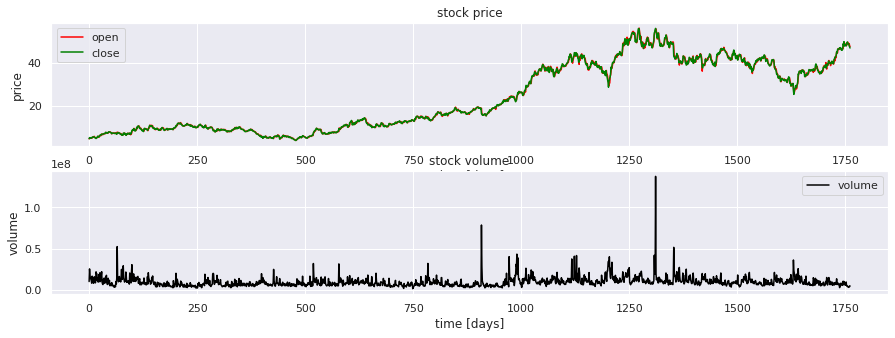

In [ ]:
plt.figure(figsize=(15, 5));
plt.subplot(2,1,1);
plt.plot(df[df.symbol == 'AAL'].open.values, color='red', label='open')
plt.plot(df[df.symbol == 'AAL'].close.values, color='green', label='close')
#plt.plot(df[df.symbol == 'AAL'].low.values, color='blue', label='low')
#plt.plot(df[df.symbol == 'AAL'].high.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(2,1, 2);
plt.plot(df[df.symbol == 'AAL'].volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

plt.show()

In [ ]:
def show_time(diff):
   m, s = divmod(diff, 60)
   h, m = divmod(m, 60)
   s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))
   print("Execution Time: " + "{0:02d}:{1:02d}:{2:02d}".format(h, m, s))

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [ ]:
# Takes in a classifier, calculates the training + prediction times and accuracy score, returns a model
def Train(clf, X, y, X_predict, y_predict, type='classification'):
    # Train
    start = time.time()
    model = clf.fit(X,y)
    end = time.time()
    print('Training time: ')
    show_time(end - start)
    training_times.append(end - start)

    # Predict
    start = time.time()
    if(type=='classification'):
        scores.append(accuracy_score(y_predict, model.predict(X_predict)))
    else:
        scores.append(rmse(y_predict, model.predict(X_predict)))
    end = time.time()
    prediction_times.append(end - start)
    print('\nPrediction time: ')
    show_time(end - start)
    return model

# Takes in a classifier, calculates the training + prediction times and accuracy score, returns a model
def GridSearch(clf, params, X, y, X_predict, y_predict, type='classification'):
    # Train
    start = time.time()
    if(type=='classification'):
        model = GridSearchCV(clf, params, scoring='accuracy', n_jobs=-1, cv=5).fit(X,y).best_estimator_
    else:
        model = GridSearchCV(clf, params, scoring='r2', n_jobs=-1, cv=5).fit(X,y).best_estimator_
    end = time.time()
    print('Training time: ')
    show_time(end - start)
    training_times.append(end - start)

    # Predict
    start = time.time()
    if(type=='classification'):
        scores.append(accuracy_score(y_predict, model.predict(X_predict)))
    else:
        scores.append(rmse(y_predict, model.predict(X_predict)))
    end = time.time()
    prediction_times.append(end - start)
    print('Prediction time: ')
    show_time(end - start)
    return model

In [ ]:
AAL_df = price[price.symbol == "AAL"]

In [ ]:
del AAL_df['symbol']
AAL_df

,date,open,close,low,high,volume
252,2010-01-04,4.840000,4.770000,4.660000,4.940000,9837300.0
719,2010-01-05,4.790000,5.310000,4.710000,5.370000,25212000.0
1187,2010-01-06,5.190000,5.090000,5.000000,5.380000,16597900.0
1655,2010-01-07,5.060000,5.240000,5.050000,5.430000,14033400.0
2123,2010-01-08,5.270000,5.140000,5.060000,5.430000,12760000.0
...,...,...,...,...,...,...
848765,2016-12-23,48.610001,48.480000,48.290001,48.840000,2914800.0
849265,2016-12-27,48.290001,48.610001,48.139999,48.919998,2797800.0
849765,2016-12-28,48.730000,47.669998,47.610001,48.830002,4153600.0
850265,2016-12-29,47.799999,47.250000,46.959999,48.000000,3709300.0


In [ ]:
print('Min date from train set: %s' % AAL_df['date'].min())
print('Max date from train set: %s' % AAL_df['date'].max())

Min date from train set: 2010-01-04
Max date from train set: 2016-12-30


In [ ]:
print(AAL_df[AAL_df['date'] == '2010-01-04'])

           date  open  close   low  high     volume
252  2010-01-04  4.84   4.77  4.66  4.94  9837300.0


In [ ]:
train = AAL_df[AAL_df['date'] <= '2010-07-10']

In [ ]:
train

,date,open,close,low,high,volume
252,2010-01-04,4.84,4.77,4.66,4.94,9837300.0
719,2010-01-05,4.79,5.31,4.71,5.37,25212000.0
1187,2010-01-06,5.19,5.09,5.00,5.38,16597900.0
1655,2010-01-07,5.06,5.24,5.05,5.43,14033400.0
2123,2010-01-08,5.27,5.14,5.06,5.43,12760000.0
...,...,...,...,...,...,...
58797,2010-07-02,8.71,8.19,8.06,8.79,7280100.0
59266,2010-07-06,8.50,8.08,8.02,8.63,7195200.0
59735,2010-07-07,8.36,9.32,8.27,9.35,14156600.0
60204,2010-07-08,9.39,9.54,9.12,9.61,8351200.0


In [ ]:
test = AAL_df[AAL_df['date'] > '2010-07-10']

In [ ]:
#테스트로 쓸 한달간의 데이터이다.
test[:10]

,date,open,close,low,high,volume
61142,2010-07-12,9.46,9.20,9.10,9.63,6380700.0
61611,2010-07-13,9.35,9.33,9.29,9.55,8415400.0
62080,2010-07-14,9.28,9.28,9.17,9.44,5781100.0
62549,2010-07-15,9.27,9.11,8.85,9.29,6418800.0
63018,2010-07-16,8.99,8.95,8.85,9.10,8012900.0
63487,2010-07-19,9.00,8.62,8.05,9.00,15840800.0
63956,2010-07-20,8.50,8.92,8.50,8.95,6788300.0
64425,2010-07-21,9.45,9.21,9.16,9.81,20595500.0
64894,2010-07-22,9.45,9.85,9.45,9.95,14386700.0
65363,2010-07-23,9.77,10.35,9.76,10.40,12390000.0


In [ ]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
lag_size = (test['date'].max().date() - train['date'].max().date()).days
print('Max date from train set: %s' % train['date'].max())
print('Max date from test set: %s' % test['date'].max().date())
print('Forecast lag size', lag_size)

Max date from train set: 2010-07-09 00:00:00
Max date from test set: 2016-12-30
Forecast lag size 2366


# 아! y로 쓸 데이터가 없구나!

In [ ]:
# function for min-max normalization of stock
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    df['close'] = min_max_scaler.fit_transform(df['close'].values.reshape(-1,1))
    return df

# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])

    valid_set_size_percentage = 10
    test_set_size_percentage = 10

    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]


In [ ]:
# choose one stock
df_stock = df[df.symbol == 'EQIX'].copy()
df_stock.drop(['symbol'],1,inplace=True)
df_stock.drop(['volume'],1,inplace=True)

cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

df_stock.columns.values =  ['open', 'close', 'low', 'high']
x_train.shape =  (1394, 19, 4)
y_train.shape =  (1394, 4)
x_valid.shape =  (174, 19, 4)
y_valid.shape =  (174, 4)
x_test.shape =  (174, 19, 4)
y_test.shape =  (174, 4)


In [ ]:
# choose one stock
df_stock = df[df.symbol == 'AAL'].copy()
df_stock.drop(['symbol'],1,inplace=True)
df_stock.drop(['volume'],1,inplace=True)

cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

df_stock.columns.values =  ['open', 'close', 'low', 'high']
x_train.shape =  (1394, 19, 4)
y_train.shape =  (1394, 4)
x_valid.shape =  (174, 19, 4)
y_valid.shape =  (174, 4)
x_test.shape =  (174, 19, 4)
y_test.shape =  (174, 4)


# 모델 사용해보기

In [ ]:
# Models
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier, LGBMRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from lightgbm.plotting import plot_importance
import lightgbm
import xgboost as xgb
import catboost
from xgboost import plot_tree

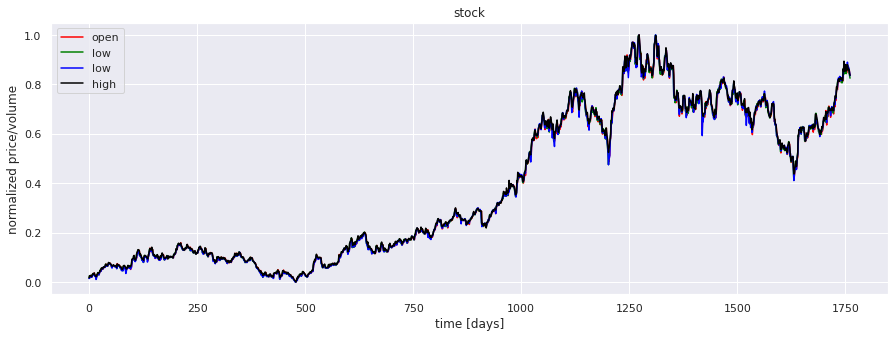

In [ ]:
plt.figure(figsize=(15, 5));
plt.plot(df_stock_norm.open.values, color='red', label='open')
plt.plot(df_stock_norm.close.values, color='green', label='low')
plt.plot(df_stock_norm.low.values, color='blue', label='low')
plt.plot(df_stock_norm.high.values, color='black', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

In [ ]:
### Basic Cell RNN in tensorflow
tf.config.run_functions_eagerly(True)

index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
        
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

# parameters
n_steps = seq_len-1 
n_inputs = 4 
n_neurons = 200 
n_outputs = 4
n_layers = 2
learning_rate = 0.001
batch_size = 50
n_epochs = 100 
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

tf.compat.v1.reset_default_graph()

X = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.compat.v1.placeholder(tf.float32, [None, n_outputs])

# use Basic RNN Cell
layers = [tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
          for layer in range(n_layers)]

# use Basic LSTM Cell 
#layers = [tf.contrib.rnn.BasicLSTMCell(num_units=n_neurons, activation=tf.nn.elu)
#          for layer in range(n_layers)]

# use LSTM Cell with peephole connections
#layers = [tf.contrib.rnn.LSTMCell(num_units=n_neurons, 
#                                  activation=tf.nn.leaky_relu, use_peepholes = True)
#          for layer in range(n_layers)]

# use GRU cell
#layers = [tf.contrib.rnn.GRUCell(num_units=n_neurons, activation=tf.nn.leaky_relu)
#          for layer in range(n_layers)]
                                                                     
multi_layer_cell = tf.compat.v1.nn.rnn_cell.MultiRNNCell(layers)
rnn_outputs, states = tf.compat.v1.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.compat.v1.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              
loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.compat.v1.train.AdamOptimizer(
    learning_rate=0.001, 
    name='Adam'
)
training_op = optimizer.minimize(loss)
# The first step is `-learning_rate*sign(grad)`
# run graph
with tf.compat.v1.Session() as sess: 
    sess.run(tf.compat.v1.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})

0.00 epochs: MSE train/valid = 0.019020/0.032335
4.99 epochs: MSE train/valid = 0.000347/0.000579
9.97 epochs: MSE train/valid = 0.000474/0.001012
14.96 epochs: MSE train/valid = 0.000271/0.000540
19.94 epochs: MSE train/valid = 0.000207/0.000421
24.93 epochs: MSE train/valid = 0.000183/0.000379
29.91 epochs: MSE train/valid = 0.000222/0.000564
34.90 epochs: MSE train/valid = 0.000212/0.000480
39.89 epochs: MSE train/valid = 0.000142/0.000352
44.87 epochs: MSE train/valid = 0.000146/0.000349
49.86 epochs: MSE train/valid = 0.000136/0.000316
54.84 epochs: MSE train/valid = 0.000126/0.000320
59.83 epochs: MSE train/valid = 0.000122/0.000341
64.81 epochs: MSE train/valid = 0.000138/0.000408
69.80 epochs: MSE train/valid = 0.000121/0.000327
74.78 epochs: MSE train/valid = 0.000112/0.000287
79.77 epochs: MSE train/valid = 0.000123/0.000300
84.76 epochs: MSE train/valid = 0.000120/0.000311
89.74 epochs: MSE train/valid = 0.000123/0.000347
94.73 epochs: MSE train/valid = 0.000178/0.000556
99.

In [ ]:
y_train.shape

(1394, 4)

correct sign prediction for close - open price for train/valid/test: 0.51/0.53/0.57


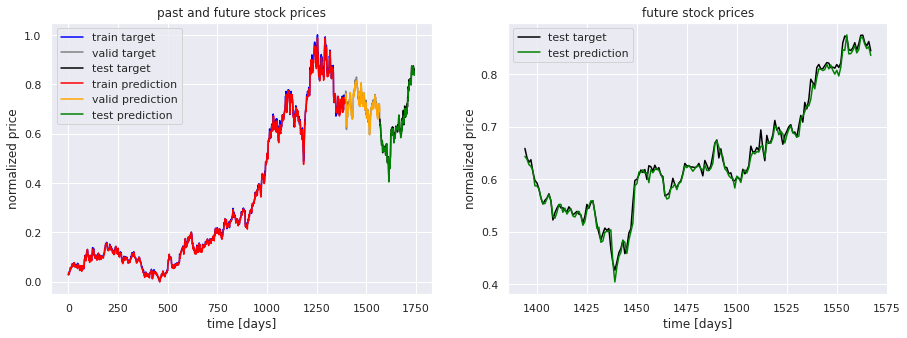

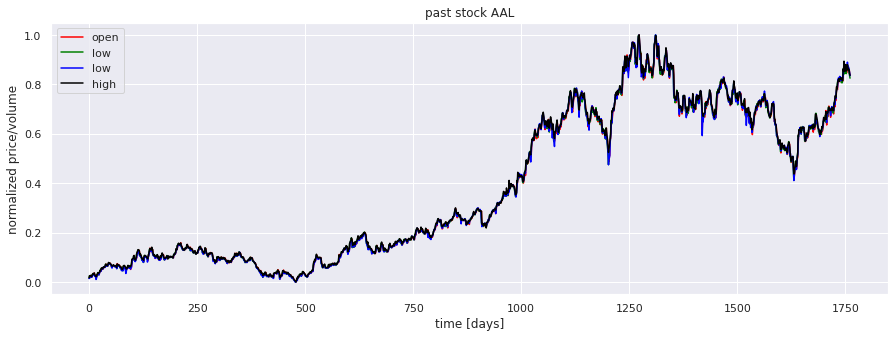

In [ ]:
ft = 0 # 0 = open, 1 = close, 2 = highest, 3 = lowest

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred[:,1]-y_train_pred[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,1]-y_valid[:,0]),
            np.sign(y_valid_pred[:,1]-y_valid_pred[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred[:,1]-y_test_pred[:,0])).astype(int)) / y_test.shape[0]

print('correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))

# 과거의 데이터
plt.figure(figsize=(15, 5));
plt.plot(df_stock_norm.open.values, color='red', label='open')
plt.plot(df_stock_norm.close.values, color='green', label='low')
plt.plot(df_stock_norm.low.values, color='blue', label='low')
plt.plot(df_stock_norm.high.values, color='black', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('past stock AAL')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()